In [763]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import statsmodels.api as smf
from sklearn import svm 
%matplotlib inline
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# Data Import

In [621]:
ds = pd.read_excel('./realEstate.xlsx', header=0, index_col=False, keep_default_na=True)

ds.head(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.666667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.666667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.416667,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500000,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.416667,17.9,1783.18000,3,24.96731,121.51486,22.1


In [66]:
ds.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


# Scaling and Correlation of data

In [736]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

ds.columns = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'Y']
data = ds.drop(columns=['X0'])

# Scale data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Normalize data


data_normalized = preprocessing.normalize(data)

# Separate Columns into different lists
X1 = []; X2 = []; X3 = []; X4 = []; X5 = []; X6 = []; Y = []

for i in data_scaled:
    X1.append(i[0])
    X2.append(i[1])
    X3.append(i[2])
    X4.append(i[3])
    X5.append(i[4])
    X6.append(i[5])
    Y.append(i[6])

print(data_scaled.mean(axis=0))
print(data_scaled.std(axis=0))

[-5.03052243e-13 -9.22504156e-17 -1.26576152e-16 -7.50875476e-18
  1.34316605e-13 -1.61453674e-12  8.58143401e-17]
[1. 1. 1. 1. 1. 1. 1.]


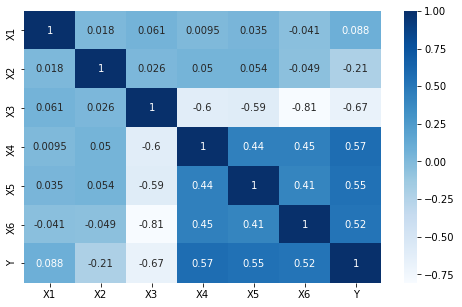

In [633]:
#Using Pearson Correlation
plt.figure(figsize=(8,5))
cor = X.corr()
sb.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()


In [637]:
#Correlation with output variable

cor_target = abs(cor["Y"])

#Selecting highly correlated features
correlated_features = cor_target[cor_target>0.5]
correlated_features

X3    0.673613
X4    0.571005
X5    0.546307
X6    0.523287
Y     1.000000
Name: Y, dtype: float64

# Scatter plots of correlated features with linear regression

In [737]:
from sklearn.model_selection import train_test_split

X3 = np.array(X3).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X3, Y, test_size=0.2, random_state=0)

reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
predictn = reg.predict(X_test)

scores=cross_val_score(reg, X_train, y_train, cv=10)

print('Root Mean Squared Error:  %0.2f' %np.sqrt(metrics.mean_squared_error(y_test, predictn)))
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print('Mean Squared Error: %.2f' %mean_squared_error(y_test, predictn))
print('Coefficient of determination: %.2f' %r2_score(y_test, predictn))

Root Mean Squared Error:  0.67
Accuracy: 0.43 (+/- 0.18)
Mean Squared Error: 0.46
Coefficient of determination: 0.52


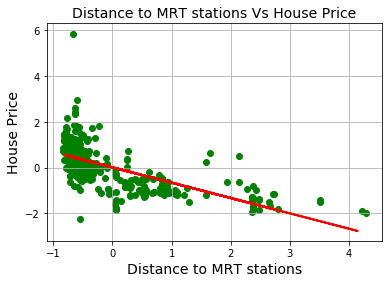

In [653]:
plt.scatter(X_train, y_train, color="green")
plt.plot(X_test, predictn, color='red', linewidth=2)
plt.title("Distance to MRT stations Vs House Price", fontsize=14)
plt.xlabel('Distance to MRT stations', fontsize=14)
plt.ylabel('House Price', fontsize=14)
plt.grid(True)

plt.show()

In [738]:
X4 = np.array(X4).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X4, Y, test_size=0.2, random_state=0)

reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
predictn = reg.predict(X_test)

print('Root Mean Squared Error:  %0.2f' %np.sqrt(metrics.mean_squared_error(y_test, predictn)))
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print('Mean Squared Error: %.2f' %mean_squared_error(y_test, predictn))
print('Coefficient of determination: %.2f' %r2_score(y_test, predictn))

Root Mean Squared Error:  0.77
Accuracy: 0.43 (+/- 0.18)
Mean Squared Error: 0.59
Coefficient of determination: 0.37


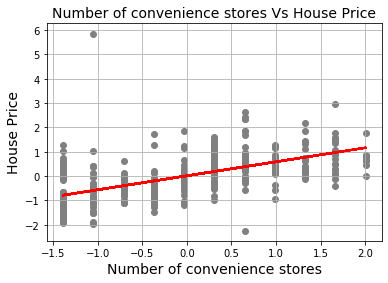

In [671]:
plt.scatter(X_train, y_train, color="gray" )
plt.plot(X_test, predictn, color='red', linewidth=2)
plt.title("Number of convenience stores Vs House Price", fontsize=14)
plt.xlabel('Number of convenience stores', fontsize=14)
plt.ylabel('House Price', fontsize=14)
plt.grid(True)
plt.show()

In [739]:
X5 = np.array(X5).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X5, Y, test_size=0.2, random_state=0)

reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
predictn = reg.predict(X_test)

print('Root Mean Squared Error:  %0.2f' %np.sqrt(metrics.mean_squared_error(y_test, predictn)))
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print('Mean Squared Error: %.2f' %mean_squared_error(y_test, predictn))
print('Coefficient of determination: %.2f' %r2_score(y_test, predictn))

Root Mean Squared Error:  0.79
Accuracy: 0.43 (+/- 0.18)
Mean Squared Error: 0.62
Coefficient of determination: 0.34


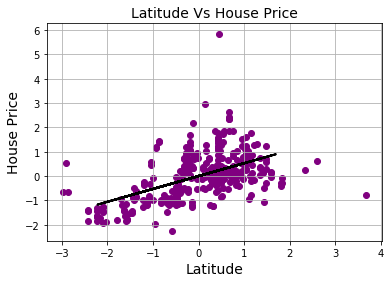

In [668]:
plt.scatter(X_train, y_train, color="purple")
plt.plot(X_test, predictn, color='black', linewidth=2)
plt.title("Latitude Vs House Price", fontsize=14)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('House Price', fontsize=14)
plt.grid(True)

plt.show()

In [740]:
X6 = np.array(X6).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X6, Y, test_size=0.2, random_state=0)

reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
predictn = reg.predict(X_test)

print('Root Mean Squared Error:  %0.2f' %np.sqrt(metrics.mean_squared_error(y_test, predictn)))
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print('Mean Squared Error: %.2f' %mean_squared_error(y_test, predictn))
print('Coefficient of determination: %.2f' %r2_score(y_test, predictn))

Root Mean Squared Error:  0.82
Accuracy: 0.43 (+/- 0.18)
Mean Squared Error: 0.66
Coefficient of determination: 0.29


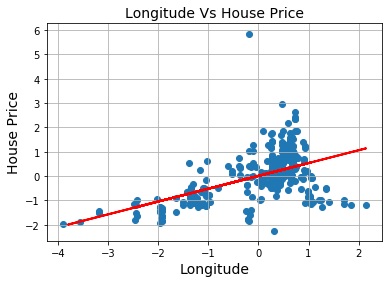

In [663]:
plt.scatter(X_train, y_train)
plt.plot(X_test, predictn, color='red', linewidth=2)
plt.title("Longitude Vs House Price", fontsize=14)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('House Price', fontsize=14)
plt.grid(True)

plt.show()


# Decision Tree

In [807]:
# fit the regression model
ds.columns = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'Y']
scaler = StandardScaler()

data = ds.drop(columns=['X0', 'Y', 'X1', 'X2'])
data_scaled = scaler.fit_transform(data)
data_normalized = preprocessing.normalize(data)

x = data_scaled
y = np.array(Y)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

y_test = y_test.reshape(83, 1)
model_tree = DecisionTreeRegressor()
pred = model_tree.fit(X_train, y_train).predict(X_test)

In [808]:
pred = pred.reshape(83, 1)

x = pd.DataFrame({'X3': x[:, 0], 'X4': x[:, 1], 'X5': x[:, 2], 'X6': x[:, 3]})

# tree.plot_tree(model_tree, max_depth=3, feature_names=x.columns, filled=True,rotate=True)

# plt.show()

In [805]:
scores= cross_val_score(model_tree, X_train, y_train, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" %(scores.mean(), scores.std() * 2))

Accuracy: 0.57 (+/- 0.31)


In [751]:
print('Root Mean Squared Error: %0.2f' %np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('Coefficient of determination: %.2f' %r2_score(y_test, pred))

Root Mean Squared Error: 0.65
Coefficient of determination: 0.56


# Multi Regression

In [813]:
from sklearn.model_selection import train_test_split

ds.columns = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'Y']
scaler = StandardScaler()

data = ds.drop(columns=['X0', 'Y', 'X1', 'X2'])
data_scaled = scaler.fit_transform(data)

x = data_scaled
y = np.array(Y)

In [814]:
from sklearn import metrics

x = data_scaled
y = Y

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)



model_reg = linear_model.LinearRegression().fit(X_train,y_train)

predictions = model.predict(X_test)

model_score = model.score(X_train, y_train)


scores=cross_val_score(model_reg, X_train, y_train, cv=10)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('Mean Squared Error: %.2f' %mean_squared_error(y_test, predictions))
print('Coefficient of determination: %.2f' %r2_score(y_test, predictions))

Accuracy: 0.50 (+/- 0.31)
Mean Absolute Error: 0.4961668480481128
Mean Squared Error: 0.39559246968246664
Root Mean Squared Error: 0.628961421457999
Mean Squared Error: 0.40
Coefficient of determination: 0.58


In [758]:
x = pd.DataFrame({'X3': x[:, 0], 'X4': x[:, 1], 'X5': x[:, 2], 'X6': x[:, 3]})
coeff_df = pd.DataFrame(model_reg.coef_, x.columns, columns=['Coefficient'])  
coeff_df 

,Coefficient
X3,-0.393292
X4,0.233529
X5,0.204994
X6,0.017594


## Cost Function

In [ ]:
theta = np.random.randn(2,1)
def cal_cost(theta, X, y):
    
    m = len(y)
    
#     predictions = X.dot(theta)
#     cost = (1/2*m)* np.sum(np.square(predictions-y))
    err = X.dot(theta) - y
    J = np.sum(error ** 2)/(2*m)
    return J

# cal_cost(theta, X, Y)

def gradient_descent(X, y, theta, learning_rate=0.01, iterations=100):
    
    m = len(y)
    
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, 2))
    for i in range(iterations):
        
        prediction = np.dot(X, theta)
        
        theta = theta -(1/m)* learning_rate*(X.T.dot((prediction - y)))
        theta_history[i,:] = theta.T
        cost_history[i] = cal_cost(theta, X, y)
    return theta, cost_history, theta_history

## Gradient Descent

In [ ]:
lr = 0.01
n_iter = 1000

theta = np.random.randn(2,1)

X_b = np.c_[np.ones(len(X2)), X2]


In [ ]:
# lr = 0.01
# n_iter = 1000

# theta = np.random.randn(2,1)

# # X_b = np.c_[np.ones((len(X2), 1)), X2]
# theta, cost_history, theta_history = gradient_descent(X2, Y, theta, lr, n_iter)

# # print('Theta0: {:0.3f},\n Theta1: {:0.3f}'.format(theta[0][0], theta[1][0]))
# print('Final cost/MSE: {:0.3f}'.format(cost_history[-1]))

In [ ]:
X = np.c_[np.ones((len(X), 1)), X_array]

theta = np.zeros(2)

theta

# SVM

In [713]:
import timeit
from sklearn import metrics
from sklearn.svm import SVR

In [809]:

ds.columns = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'Y']
scaler = StandardScaler()

data = ds.drop(columns=['X0', 'Y', 'X1', 'X2'])
data_scaled = scaler.fit_transform(data)

x = data_scaled
y = np.array(Y)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

scores= cross_val_score(model_svm, X_train, y_train, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" %(scores.mean(), scores.std() * 2))


Accuracy: 0.62 (+/- 0.24)


In [810]:

clf = SVR(C=1.0, epsilon=0.2)
y_pred = clf.fit(X_train, y_train).predict(X_test)
SVR(epsilon=0.2)
print('Root Mean Squared Error: %0.2f' %np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Coefficient of determination: %.2f' %r2_score(y_test, y_pred))

Root Mean Squared Error: 0.56
Coefficient of determination: 0.66


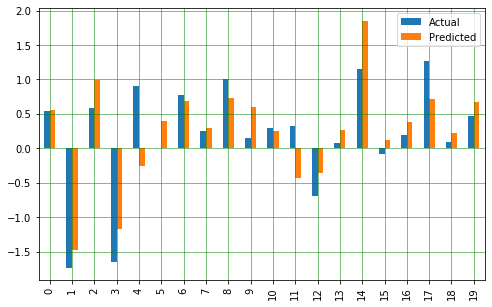

In [732]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(20)

df1.plot(kind='bar',figsize=(8,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# KNN


In [811]:
n_neighbors = 15

ds.columns = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'Y']
scaler = StandardScaler()

data = ds.drop(columns=['X0', 'Y', 'X1', 'X2'])
data_scaled = scaler.fit_transform(data)

x = data_scaled
y = np.array(Y)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


model_knn = KNeighborsRegressor(n_neighbors, weights='distance')
y_pred = knn.fit(X_train, y_train).predict(X_test)

scores=cross_val_score(model_knn, X_train, y_train, cv=10)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Accuracy: 0.66 (+/- 0.24)
Root Mean Squared Error: 0.5525131242411114
